In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
csvfile = 'DataFiles/FDNY/Geoid_Count2018.csv'
data = pd.read_csv(csvfile)

Season = [['03','04','05'],['06','07','08'],['09','10','11'],['12','01','02']]
Season_word = ['Spring','Summer','Autumn','Winter']
Month_data = pd.DataFrame(columns = ['Geoid','Spring','Summer','Autumn','Winter']) # create a new Dataframe with each month
info = np.array(['36005046201','36047091000']) 
Spring_Count = np.array([0,0])
Summer_Count = np.array([0,0])
Autumn_Count = np.array([0,0])
Winter_Count = np.array([0,0])

for row in range(0,len(data)): 
        
    detail = str(data.iat[row,1])
                     
    if detail in info:                          # if the string already exist, we will just increment the count
        itemindex = np.where(info == detail)
    else:                                       # else we will have to add the string to info array and create an extra count
        info = np.append(info,detail)
        Spring_Count = np.append(Spring_Count,0)
        Summer_Count = np.append(Summer_Count,0)
        Autumn_Count = np.append(Autumn_Count,0)
        Winter_Count = np.append(Winter_Count,0)
        itemindex = np.where(info == detail)
        
    if data.iat[row,0][0:2] == '03' or data.iat[row,0][0:2] == '04' or data.iat[row,0][0:2] == '05':
        Spring_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '06' or data.iat[row,0][0:2] == '07' or data.iat[row,0][0:2] == '08':
        Summer_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '09' or data.iat[row,0][0:2] == '10' or data.iat[row,0][0:2] == '11':
        Autumn_Count[itemindex[0][0]] += data.iat[row,2]
    elif data.iat[row,0][0:2] == '12' or data.iat[row,0][0:2] == '01' or data.iat[row,0][0:2] == '02':
        Winter_Count[itemindex[0][0]] += data.iat[row,2]
    
for row in range(0,len(info)):
    Month_data = Month_data.append({'Geoid' : info[row], 'Spring' : Spring_Count[row],  'Summer': Summer_Count[row], 'Autumn' : Autumn_Count[row], 'Winter' : Winter_Count[row] } , ignore_index=True)
print(Month_data)

            Geoid Spring Summer Autumn Winter
0     36005046201     42     51     58     35
1     36047091000     18     37     41     35
2     36047089000      4      5      5      8
3     36081043701      0      1      1      3
4     36085012200      0      0      2      2
...           ...    ...    ...    ...    ...
2033  36005023100      0      0      0      3
2034  36081053800      0      0      0      1
2035  36081077300      0      0      0      1
2036  36047052800      0      0      0      1
2037  36047030200      0      0      0      1

[2038 rows x 5 columns]


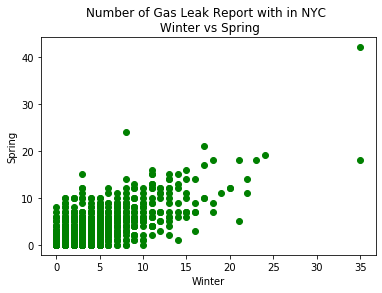

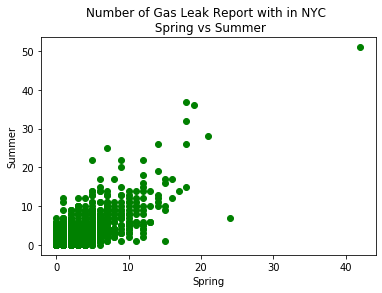

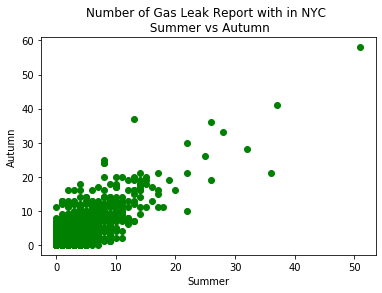

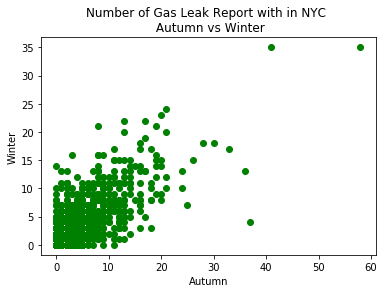

In [17]:
Spring = Month_data.Spring.values
Summer = Month_data.Summer.values
Autumn = Month_data.Autumn.values
Winter = Month_data.Winter.values

plt.scatter(Winter,Spring, color='Green')
plt.xlabel('Winter')
plt.ylabel('Spring')
plt.title('Number of Gas Leak Report with in NYC \n Winter vs Spring')
plt.show()

plt.scatter(Spring,Summer, color='Green')
plt.xlabel('Spring')
plt.ylabel('Summer')
plt.title('Number of Gas Leak Report with in NYC \n Spring vs Summer')
plt.show()

plt.scatter(Summer,Autumn, color='Green')
plt.xlabel('Summer')
plt.ylabel('Autumn')
plt.title('Number of Gas Leak Report with in NYC \n Summer vs Autumn')
plt.show()

plt.scatter(Autumn,Winter, color='Green')
plt.xlabel('Autumn')
plt.ylabel('Winter')
plt.title('Number of Gas Leak Report with in NYC \n Autumn vs Winter')
plt.show()